<a href="https://colab.research.google.com/github/RonnyGuevara/Machine-Learning/blob/main/TP5/TP5_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

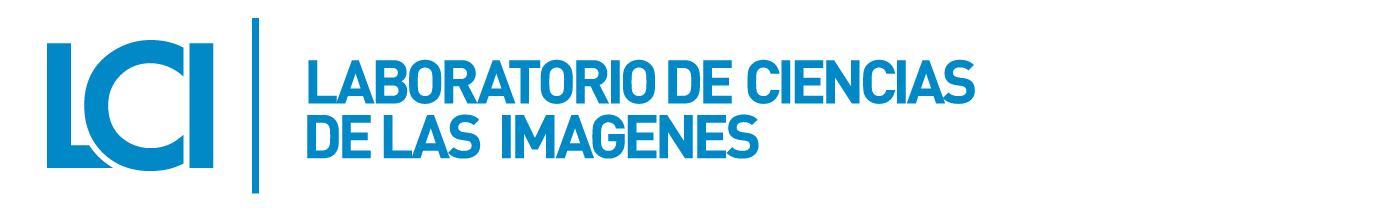

#Práctica 5: Clustering

##Presentado por: Ronny Guevara

## Objetivo General
Desarrollar un algoritmo de aprendizaje automático no-supervisado que permita encontrar segmentos en clientes minoristas
## Objetivos Específicos
*   Desarrollar clustering que permite segmentar clientes en función del consumo anual de productos
*   Verificar los métodos de clustering a diferentes parámetros
*   Visualizar los resultados para distintos métodos de clustering

###Problema
Segmentación de clientes: El objetivo es encontrar segmentos (grupos) de clientes minoristas en función de su patrón de consumo anual en diversas categorías de productos. https://github.com/manlio99/Materia-de-aprendizaje/tree/master/3_MidtermProjects/ProjectWC

In [1]:
#Lectura de librerías
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

###1. Tratamiento de los datos

In [2]:
#Lectura de datos
df = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectWC/data/wholesale_customers_data.csv")
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [3]:
#Visualización de los atributos
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [4]:
#Cuenta los valores nulos para cada columna
df.isnull().values.sum()

0

In [5]:
#Permite obtener los estadísticos descriptivos
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [6]:
#info() devuelve el total de valores no nulos y tipo de dato para cada atributo
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


Es importante conocer si existe algún tipo de asociación entre atributos, corr() describe la correlación entre atributos de la dataframe

In [7]:
df.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


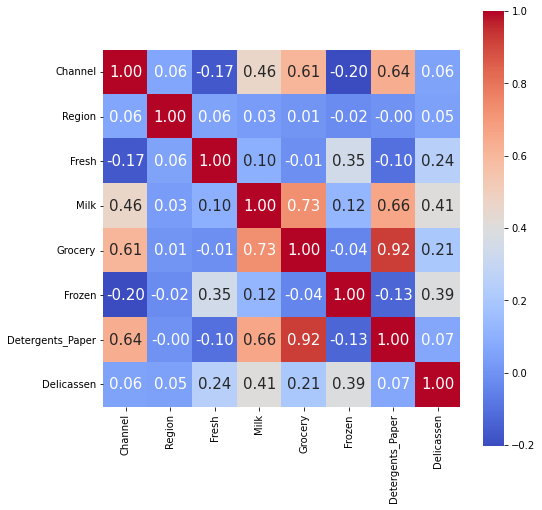

In [8]:
corr = df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= corr, yticklabels= corr,
           cmap= 'coolwarm')

Para una mejor interpretación se visualiza la correlación entre atributos, dando como resultado que no existen columnas con multicolinealidad.

###Normalización de datos
Es importante normalizar los datos para corregir anomalías y trabajar a una misma escala.

In [9]:
from sklearn.preprocessing import normalize

df_nor = normalize(df)
df_nor = pd.DataFrame(df_nor, columns = df.columns)
df_nor

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294
...,...,...,...,...,...,...,...,...
435,0.000026,0.000078,0.776890,0.315197,0.419191,0.343549,0.004760,0.057646
436,0.000025,0.000076,0.990872,0.036146,0.019298,0.113919,0.002349,0.059258
437,0.000050,0.000075,0.364462,0.388465,0.758545,0.010961,0.372237,0.046827
438,0.000091,0.000273,0.937737,0.180530,0.203404,0.094594,0.015310,0.193653


In [10]:
df_nor.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,0.000105,0.000230,0.608111,0.306342,0.414267,0.185777,0.137032,0.087564
std,0.000110,0.000329,0.339614,0.216936,0.267369,0.200710,0.149245,0.089597
min,0.000008,0.000018,0.000175,0.005848,0.000143,0.000644,0.000143,0.000077
25%,0.000053,0.000092,0.285100,0.123490,0.164689,0.045811,0.020551,0.030020
50%,0.000085,0.000155,0.722229,0.251437,0.375277,0.112828,0.062453,0.062284
75%,0.000125,0.000250,0.927366,0.455574,0.654840,0.243927,0.242912,0.117928
max,0.001553,0.004660,0.999391,0.926102,0.976789,0.944218,0.903593,0.642610


###2. Clustering

###2.1. Dendrograma
Representación gráfica que permite apreciar claramente las relaciones de agrupación entre datos.

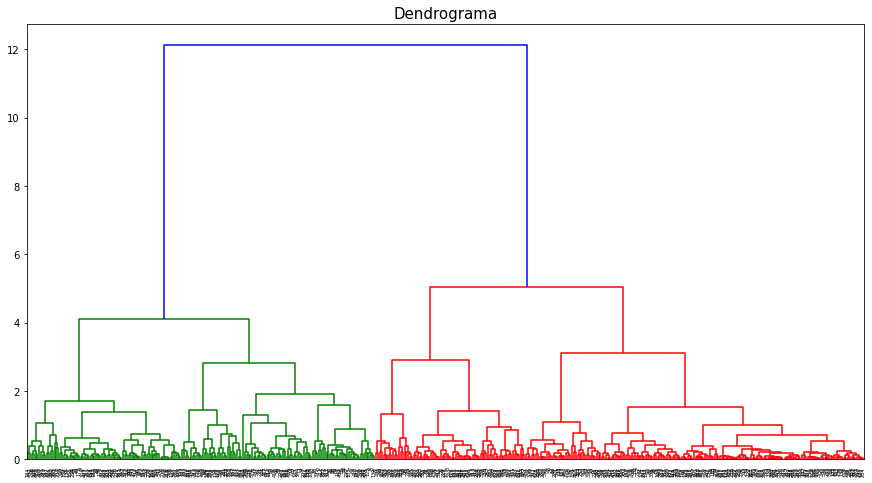

In [11]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(15, 8))  
plt.title("Dendrograma", fontsize = 15)  
dend = shc.dendrogram(shc.linkage(df_nor, method='ward'))

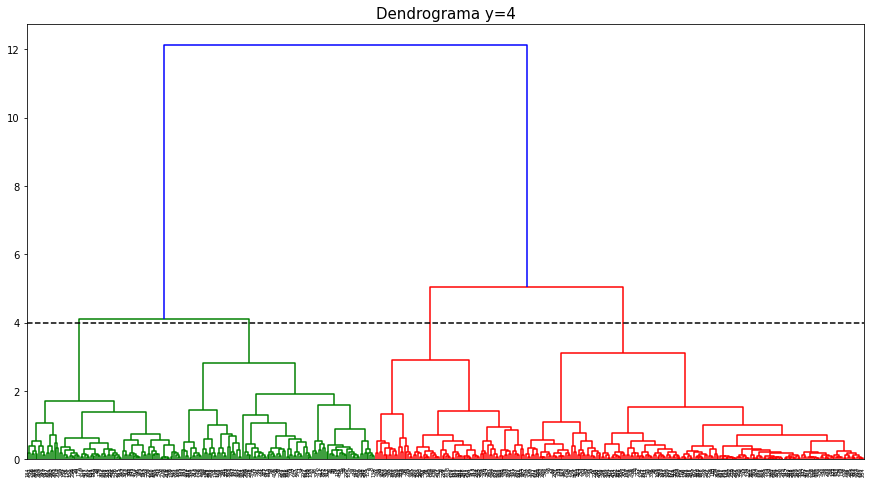

In [12]:
#Dendrograma con línea de corte en y = 4
plt.figure(figsize=(15, 8))  
plt.title("Dendrograma y=4", fontsize = 15)
line = shc.linkage(df_nor, method='ward')
dend = shc.dendrogram( line )
plt.axhline(y=4, color='black', linestyle='--')
plt.show()

###2.2. Cluster: Agrupación jerárquica aglomerativa

In [13]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  

In [14]:
cluster.fit_predict(df_nor)

array([1, 1, 1, 2, 0, 1, 0, 1, 1, 3, 3, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2,
       0, 1, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 1, 3, 0, 1, 1, 0, 0, 0, 1, 3,
       1, 1, 3, 1, 1, 3, 2, 1, 0, 3, 0, 1, 3, 1, 0, 1, 0, 1, 1, 1, 2, 3,
       3, 0, 1, 0, 2, 0, 2, 2, 1, 0, 2, 1, 0, 1, 0, 3, 1, 0, 0, 3, 1, 0,
       2, 0, 0, 2, 1, 2, 1, 3, 3, 2, 2, 2, 1, 3, 1, 0, 0, 0, 3, 1, 1, 3,
       0, 1, 2, 0, 0, 0, 0, 1, 0, 2, 0, 2, 0, 1, 0, 0, 2, 0, 1, 0, 2, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 2, 0, 1, 0, 0, 2, 0, 0, 1, 0, 1,
       0, 3, 3, 0, 3, 3, 3, 0, 0, 3, 1, 1, 1, 1, 0, 2, 3, 1, 3, 3, 3, 3,
       0, 0, 0, 1, 0, 0, 3, 1, 3, 2, 2, 3, 1, 1, 2, 0, 0, 3, 0, 2, 2, 3,
       2, 0, 3, 3, 0, 3, 3, 3, 0, 1, 3, 3, 0, 3, 0, 1, 3, 3, 3, 0, 3, 2,
       0, 1, 2, 2, 0, 0, 0, 2, 1, 2, 2, 1, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0,
       0, 0, 1, 3, 0, 0, 0, 2, 2, 3, 2, 0, 1, 0, 0, 2, 0, 0, 0, 2, 0, 3,
       3, 1, 3, 0, 1, 0, 2, 1, 1, 0, 1, 1, 0, 2, 2, 0, 1, 0, 0, 2, 0, 0,
       0, 2, 0, 0, 1, 2, 3, 1, 0, 0, 0, 0, 1, 3, 0,

In [15]:
cluster.labels_

array([1, 1, 1, 2, 0, 1, 0, 1, 1, 3, 3, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2,
       0, 1, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 1, 3, 0, 1, 1, 0, 0, 0, 1, 3,
       1, 1, 3, 1, 1, 3, 2, 1, 0, 3, 0, 1, 3, 1, 0, 1, 0, 1, 1, 1, 2, 3,
       3, 0, 1, 0, 2, 0, 2, 2, 1, 0, 2, 1, 0, 1, 0, 3, 1, 0, 0, 3, 1, 0,
       2, 0, 0, 2, 1, 2, 1, 3, 3, 2, 2, 2, 1, 3, 1, 0, 0, 0, 3, 1, 1, 3,
       0, 1, 2, 0, 0, 0, 0, 1, 0, 2, 0, 2, 0, 1, 0, 0, 2, 0, 1, 0, 2, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 2, 0, 1, 0, 0, 2, 0, 0, 1, 0, 1,
       0, 3, 3, 0, 3, 3, 3, 0, 0, 3, 1, 1, 1, 1, 0, 2, 3, 1, 3, 3, 3, 3,
       0, 0, 0, 1, 0, 0, 3, 1, 3, 2, 2, 3, 1, 1, 2, 0, 0, 3, 0, 2, 2, 3,
       2, 0, 3, 3, 0, 3, 3, 3, 0, 1, 3, 3, 0, 3, 0, 1, 3, 3, 3, 0, 3, 2,
       0, 1, 2, 2, 0, 0, 0, 2, 1, 2, 2, 1, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0,
       0, 0, 1, 3, 0, 0, 0, 2, 2, 3, 2, 0, 1, 0, 0, 2, 0, 0, 0, 2, 0, 3,
       3, 1, 3, 0, 1, 0, 2, 1, 1, 0, 1, 1, 0, 2, 2, 0, 1, 0, 0, 2, 0, 0,
       0, 2, 0, 0, 1, 2, 3, 1, 0, 0, 0, 0, 1, 3, 0,

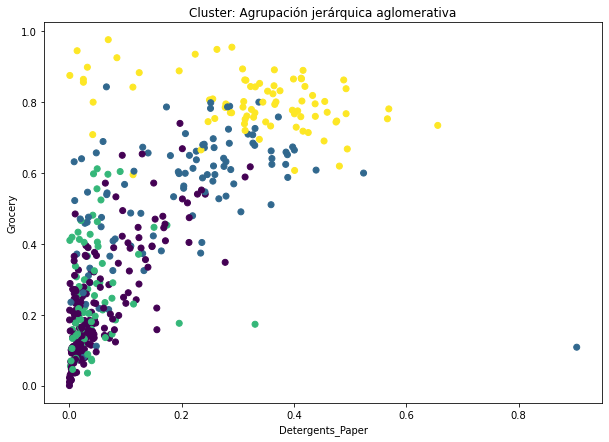

In [16]:
plt.figure(figsize=(10, 7))  
plt.scatter(df_nor['Detergents_Paper'], df_nor['Grocery'], c=cluster.labels_)
plt.title("Cluster: Agrupación jerárquica aglomerativa")
plt.xlabel("Detergents_Paper")
plt.ylabel("Grocery")
plt.show()

###Agrupación jerárquica aglomerativa interactivo con el usuario
Una vez probado el clustering, solicitaremos al usuario elegir el n_clusters y atributos con el que desea evaluar

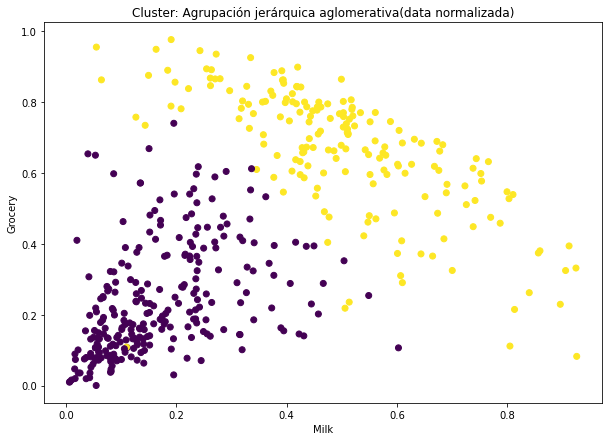

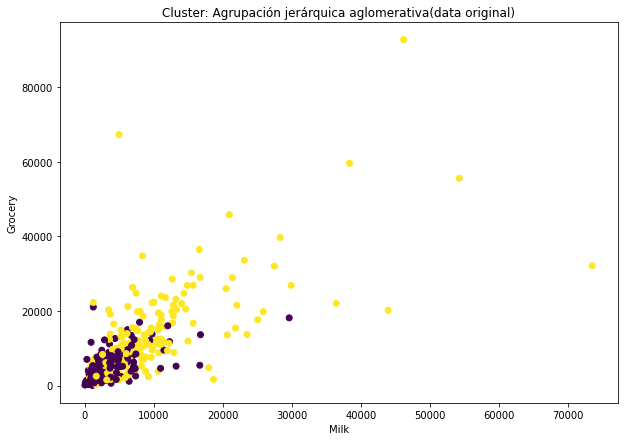

In [17]:
#@title Selección de valores { run: "auto" }
n_clusters = 2 #@param {type:"slider", min:1, max:8, step:1}
distance = 'euclidean' #@param ["euclidean", "manhattan", "cosine"]
linkage = 'ward' #@param ["ward", "complete", "average", "single"]
option = 'Milk' #@param ["Channel", "Region", "Fresh", "Milk", "Grocery", "Frozen","Detergents_Paper", "Delicassen"]
option_2 = 'Grocery' #@param ["Channel", "Region", "Fresh", "Milk", "Grocery", "Frozen","Detergents_Paper", "Delicassen"]

cluster = AgglomerativeClustering(n_clusters=n_clusters, affinity=distance, linkage=linkage)
cluster.fit_predict(df_nor)
cluster.labels_
plt.figure(figsize=(10, 7))  
plt.scatter(df_nor[option], df_nor[option_2], c=cluster.labels_)
plt.title("Cluster: Agrupación jerárquica aglomerativa(data normalizada)")
plt.xlabel(option)
plt.ylabel(option_2)
plt.show()

plt.figure(figsize=(10, 7))  
plt.scatter(df[option], df[option_2], c=cluster.labels_)
plt.title("Cluster: Agrupación jerárquica aglomerativa(data original)")
plt.xlabel(option)
plt.ylabel(option_2)
plt.show()

-------------------------

###2.3. Cluster: KMeans

Codo de Jambu

Permite determinar cual es el cluster mas apropiado

In [18]:
from sklearn.cluster import KMeans

wcss = []
for i in range (1,11):
  kmeans = KMeans(n_clusters=i, max_iter = 300)
  kmeans.fit(df_nor)
  wcss.append(kmeans.inertia_)

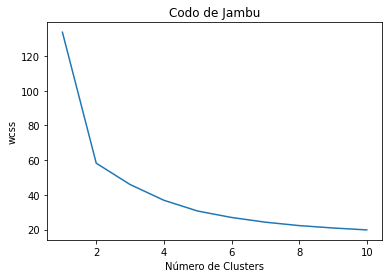

In [19]:
plt.plot(range(1,11),wcss)
plt.title("Codo de Jambu")
plt.xlabel("Número de Clusters")
plt.ylabel("wcss")
plt.show()

In [20]:
kmeans = KMeans(n_clusters=3, max_iter = 300, random_state=0).fit(df_nor)
kmeans

KMeans(n_clusters=3, random_state=0)

In [21]:
df_nor['KMeans_Clusters'] = kmeans.labels_
df_nor.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,KMeans_Clusters
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809,1
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286,2
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619,2
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494,1
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294,1


Análisis de componentes principales

En estadística, el análisis de componentes principales (en inglés, PCA) es una técnica utilizada para describir un conjunto de datos en términos de nuevas variables no correlacionadas. Los componentes se ordenan por la cantidad de varianza original que describen, por lo que la técnica es útil para reducir la dimensionalidad de un conjunto de datos.

In [22]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_df_nor = pca.fit_transform(df_nor)
pca_df_nor = pd.DataFrame(data = pca_df_nor, columns = ['Componente_1', 'Componente_2'])
pca_nombres = pd.concat([pca_df_nor, df_nor[['KMeans_Clusters']]], axis = 1)
pca_nombres

,Componente_1,Componente_2,KMeans_Clusters
0,0.192773,0.029673,1
1,-0.807810,-0.044780,2
2,-0.774981,-0.034631,2
3,0.447679,-0.100871,1
4,0.385221,-0.179539,1
...,...,...,...
435,0.330092,0.032234,1
436,0.527507,-0.415047,1
437,-0.875832,-0.008842,2
438,0.426386,-0.276587,1


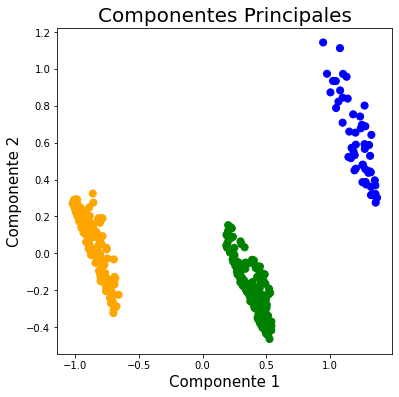

In [23]:
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Componente 1', fontsize = 15)
ax.set_ylabel('Componente 2', fontsize = 15)
ax.set_title('Componentes Principales', fontsize = 20)

color_theme = np.array(["blue", "green", "orange"])
ax.scatter(x = pca_nombres.Componente_1, y =pca_nombres.Componente_2,
           c=color_theme[pca_nombres.KMeans_Clusters], s = 50)
plt.show()

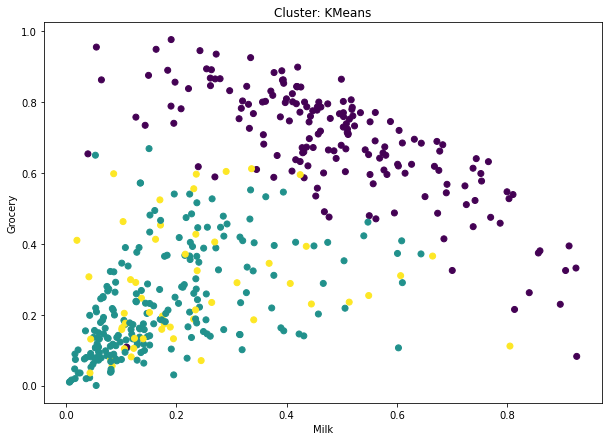

In [24]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(df_nor)
kmeans.labels_
plt.figure(figsize=(10, 7))  
plt.scatter(df_nor['Milk'], df_nor['Grocery'], c=kmeans.labels_)
plt.title("Cluster: KMeans")
plt.xlabel('Milk')
plt.ylabel('Grocery')
plt.show()

###KMeans interactivo con el usuario
Una vez probado el clustering, solicitaremos al usuario elegir el n_clusters y atributos con el que desea evaluar

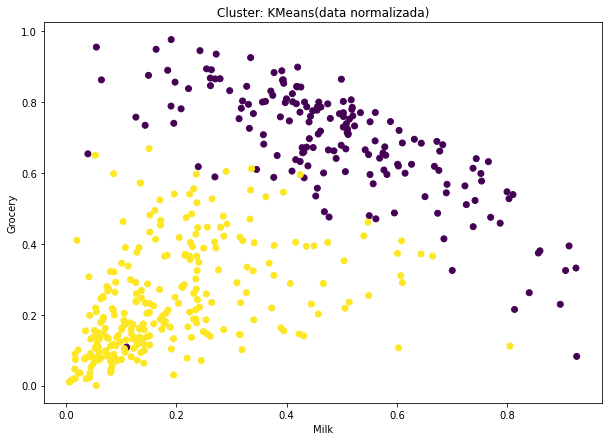

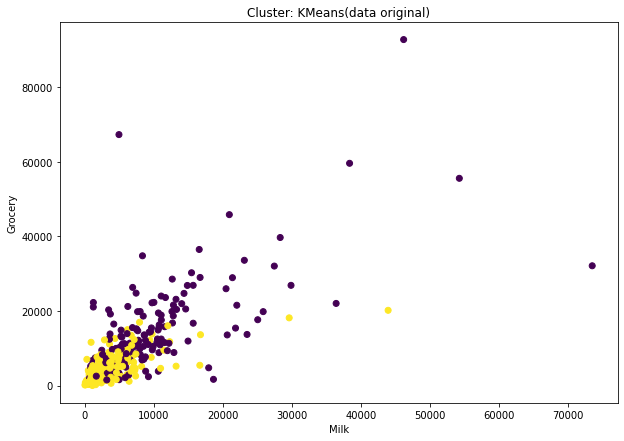

In [25]:
#@title Selección de valores { run: "auto" }
n_clusters = 2 #@param {type:"slider", min:1, max:8, step:1}
algorithm = 'full' #@param ["lloyd", "elkan", "auto", "full"]
option = 'Milk' #@param ["Channel", "Region", "Fresh", "Milk", "Grocery", "Frozen","Detergents_Paper", "Delicassen"]
option_2 = 'Grocery' #@param ["Channel", "Region", "Fresh", "Milk", "Grocery", "Frozen","Detergents_Paper", "Delicassen"]

kmeans = KMeans(n_clusters=n_clusters, random_state=0, algorithm = algorithm).fit(df_nor)
kmeans.labels_
plt.figure(figsize=(10, 7))  
plt.scatter(df_nor[option], df_nor[option_2], c=kmeans.labels_)
plt.title("Cluster: KMeans(data normalizada)")
plt.xlabel(option)
plt.ylabel(option_2)
plt.show()

plt.figure(figsize=(10, 7))  
plt.scatter(df[option], df[option_2], c=kmeans.labels_)
plt.title("Cluster: KMeans(data original)")
plt.xlabel(option)
plt.ylabel(option_2)
plt.show()

###2.3. Cluster: AffinityPropagation

In [26]:
#Matriz de Similitud
productos = set(df_nor.keys())
matrix = pd.DataFrame(0, columns=df_nor.columns, index=df_nor.columns) 

for i in productos:
    for k in productos:
        matrix.loc[i, k] = -((df_nor[i] - df_nor[k])**2).sum()

matrix

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,KMeans_Clusters
Channel,0.000000,-0.000030,-213.293485,-61.920960,-106.851105,-32.851127,-18.027468,-6.888649,-905.881425
Region,-0.000030,-0.000000,-213.225245,-61.886996,-106.806959,-32.823814,-18.018006,-6.876698,-905.758862
Fresh,-213.293485,-213.225245,-0.000000,-154.576641,-164.598885,-143.109937,-188.454743,-176.776125,-557.241526
Milk,-61.920960,-61.886996,-154.576641,-0.000000,-31.770436,-52.621286,-31.895365,-40.754053,-554.917636
Grocery,-106.851105,-106.806959,-164.598885,-31.770436,-0.000000,-87.135489,-49.654784,-80.577458,-441.045784
Frozen,-32.851127,-32.823814,-143.109937,-52.621286,-87.135489,-0.000000,-37.562641,-23.905757,-808.562295
Detergents_Paper,-18.027468,-18.018006,-188.454743,-31.895365,-49.654784,-37.562641,-0.000000,-15.398683,-715.250330
Delicassen,-6.888649,-6.876698,-176.776125,-40.754053,-80.577458,-23.905757,-15.398683,-0.000000,-813.771326
KMeans_Clusters,-905.881425,-905.758862,-557.241526,-554.917636,-441.045784,-808.562295,-715.250330,-813.771326,0.000000


In [27]:
#Preferencia a priori de cada punto
np.fill_diagonal(matrix.values, np.min(matrix.values))
matrix

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,KMeans_Clusters
Channel,-905.881425,-0.000030,-213.293485,-61.920960,-106.851105,-32.851127,-18.027468,-6.888649,-905.881425
Region,-0.000030,-905.881425,-213.225245,-61.886996,-106.806959,-32.823814,-18.018006,-6.876698,-905.758862
Fresh,-213.293485,-213.225245,-905.881425,-154.576641,-164.598885,-143.109937,-188.454743,-176.776125,-557.241526
Milk,-61.920960,-61.886996,-154.576641,-905.881425,-31.770436,-52.621286,-31.895365,-40.754053,-554.917636
Grocery,-106.851105,-106.806959,-164.598885,-31.770436,-905.881425,-87.135489,-49.654784,-80.577458,-441.045784
Frozen,-32.851127,-32.823814,-143.109937,-52.621286,-87.135489,-905.881425,-37.562641,-23.905757,-808.562295
Detergents_Paper,-18.027468,-18.018006,-188.454743,-31.895365,-49.654784,-37.562641,-905.881425,-15.398683,-715.250330
Delicassen,-6.888649,-6.876698,-176.776125,-40.754053,-80.577458,-23.905757,-15.398683,-905.881425,-813.771326
KMeans_Clusters,-905.881425,-905.758862,-557.241526,-554.917636,-441.045784,-808.562295,-715.250330,-813.771326,-905.881425


In [28]:
#Mensajes de Disponibilidad
# Matriz de Disponibilidad
matrix_dis = pd.DataFrame(0, columns=df_nor.columns, index=df_nor.columns) 
matrix_dis

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,KMeans_Clusters
Channel,0,0,0,0,0,0,0,0,0
Region,0,0,0,0,0,0,0,0,0
Fresh,0,0,0,0,0,0,0,0,0
Milk,0,0,0,0,0,0,0,0,0
Grocery,0,0,0,0,0,0,0,0,0
Frozen,0,0,0,0,0,0,0,0,0
Detergents_Paper,0,0,0,0,0,0,0,0,0
Delicassen,0,0,0,0,0,0,0,0,0
KMeans_Clusters,0,0,0,0,0,0,0,0,0


In [29]:
# La responsabilidad se actualiza a partir de la similitud y la disponibilidad
matrix

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,KMeans_Clusters
Channel,-905.881425,-0.000030,-213.293485,-61.920960,-106.851105,-32.851127,-18.027468,-6.888649,-905.881425
Region,-0.000030,-905.881425,-213.225245,-61.886996,-106.806959,-32.823814,-18.018006,-6.876698,-905.758862
Fresh,-213.293485,-213.225245,-905.881425,-154.576641,-164.598885,-143.109937,-188.454743,-176.776125,-557.241526
Milk,-61.920960,-61.886996,-154.576641,-905.881425,-31.770436,-52.621286,-31.895365,-40.754053,-554.917636
Grocery,-106.851105,-106.806959,-164.598885,-31.770436,-905.881425,-87.135489,-49.654784,-80.577458,-441.045784
Frozen,-32.851127,-32.823814,-143.109937,-52.621286,-87.135489,-905.881425,-37.562641,-23.905757,-808.562295
Detergents_Paper,-18.027468,-18.018006,-188.454743,-31.895365,-49.654784,-37.562641,-905.881425,-15.398683,-715.250330
Delicassen,-6.888649,-6.876698,-176.776125,-40.754053,-80.577458,-23.905757,-15.398683,-905.881425,-813.771326
KMeans_Clusters,-905.881425,-905.758862,-557.241526,-554.917636,-441.045784,-808.562295,-715.250330,-813.771326,-905.881425


In [30]:
from sklearn.cluster import AffinityPropagation

Affinity = AffinityPropagation(random_state=0).fit(df_nor)
cluster_centers_indices = Affinity.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
print("Estimated number of clusters: %d" % n_clusters_)
Affinity.labels_

Estimated number of clusters: 9


array([0, 6, 6, 7, 0, 0, 0, 2, 2, 4, 4, 3, 0, 0, 0, 3, 4, 0, 0, 2, 3, 5,
       7, 6, 0, 0, 7, 3, 4, 3, 0, 6, 3, 3, 2, 4, 3, 2, 4, 3, 7, 3, 2, 4,
       2, 6, 4, 2, 2, 4, 5, 2, 3, 4, 3, 2, 4, 4, 3, 2, 2, 2, 2, 2, 5, 4,
       1, 0, 8, 3, 5, 2, 8, 7, 2, 3, 8, 4, 3, 6, 0, 4, 2, 3, 0, 4, 6, 3,
       8, 3, 7, 5, 4, 8, 6, 1, 1, 8, 8, 5, 2, 4, 4, 7, 3, 3, 4, 2, 6, 1,
       3, 2, 7, 3, 3, 3, 3, 0, 3, 7, 3, 5, 3, 2, 3, 3, 7, 0, 6, 3, 5, 3,
       3, 3, 3, 0, 6, 6, 0, 0, 0, 3, 3, 5, 3, 2, 3, 0, 5, 3, 3, 6, 3, 6,
       3, 4, 1, 3, 4, 4, 1, 3, 3, 4, 2, 2, 2, 2, 3, 7, 4, 6, 4, 4, 1, 4,
       3, 0, 0, 8, 0, 3, 4, 8, 1, 7, 5, 6, 2, 6, 7, 3, 0, 1, 0, 7, 5, 4,
       0, 3, 4, 4, 0, 1, 1, 4, 3, 4, 4, 4, 3, 4, 3, 6, 4, 4, 4, 3, 1, 7,
       3, 2, 8, 8, 3, 0, 0, 5, 4, 5, 5, 6, 3, 6, 7, 6, 7, 3, 3, 3, 7, 3,
       3, 0, 2, 4, 3, 3, 3, 5, 5, 4, 8, 0, 6, 3, 0, 5, 3, 3, 0, 5, 3, 1,
       4, 6, 1, 3, 2, 3, 5, 6, 6, 3, 6, 8, 3, 8, 7, 0, 0, 0, 3, 7, 3, 3,
       7, 7, 3, 3, 2, 0, 8, 4, 3, 0, 3, 2, 2, 1, 0,

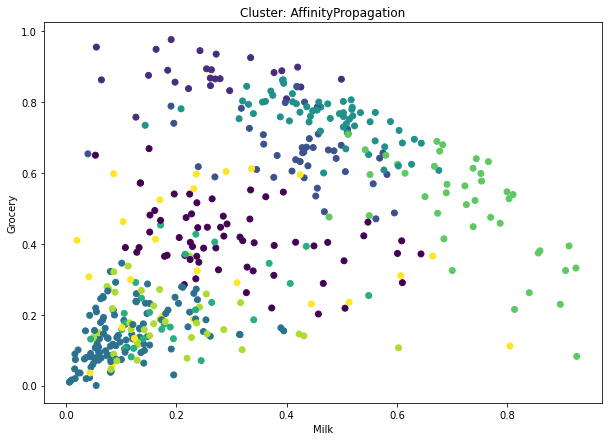

In [31]:
plt.figure(figsize=(10, 7))  
plt.scatter(df_nor['Milk'], df_nor['Grocery'], c=Affinity.labels_)
plt.title("Cluster: AffinityPropagation")
plt.xlabel('Milk')
plt.ylabel('Grocery')
plt.show()

###AffinityPropagation interactivo con el usuario
Una vez probado el clustering, solicitaremos al usuario elegir el random state con el que desea evaluar

Estimated number of clusters: 15


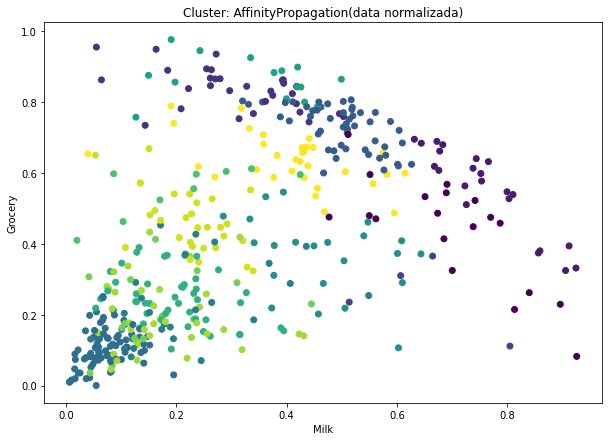

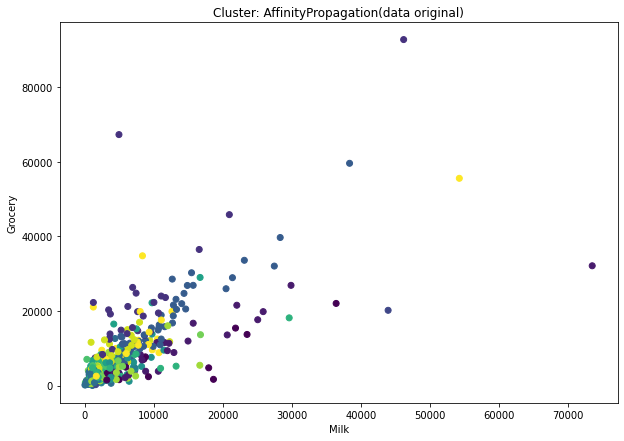

In [32]:
#@title Selección de valores { run: "auto" }
random_state = 0 #@param {type:"slider", min:0, max:5, step:1}
option = 'Milk' #@param ["Channel", "Region", "Fresh", "Milk", "Grocery", "Frozen","Detergents_Paper", "Delicassen"]
option_2 = 'Grocery' #@param ["Channel", "Region", "Fresh", "Milk", "Grocery", "Frozen","Detergents_Paper", "Delicassen"]

Affinity = AffinityPropagation(preference=-0.95, random_state=random_state).fit(df_nor)
cluster_centers_indices = Affinity.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
print("Estimated number of clusters: %d" % n_clusters_)
plt.figure(figsize=(10, 7))  
plt.scatter(df_nor[option], df_nor[option_2], c=Affinity.labels_)
plt.title("Cluster: AffinityPropagation(data normalizada)")
plt.xlabel(option)
plt.ylabel(option_2)
plt.show()

plt.figure(figsize=(10, 7))  
plt.scatter(df[option], df[option_2], c=Affinity.labels_)
plt.title("Cluster: AffinityPropagation(data original)")
plt.xlabel(option)
plt.ylabel(option_2)
plt.show()

###2.4. Cluster: MeanShift

In [33]:
from sklearn.cluster import MeanShift, estimate_bandwidth
bandwidth = estimate_bandwidth(df_nor, quantile=0.1, n_samples=100)
ms = MeanShift(bandwidth=bandwidth,bin_seeding=True, n_jobs=4)
ms.fit(df_nor)

MeanShift(bandwidth=0.302907514009874, bin_seeding=True, n_jobs=4)

In [34]:
labels = ms.labels_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
print("Number of estimated clusters :{}".format(n_clusters_))

Number of estimated clusters :16


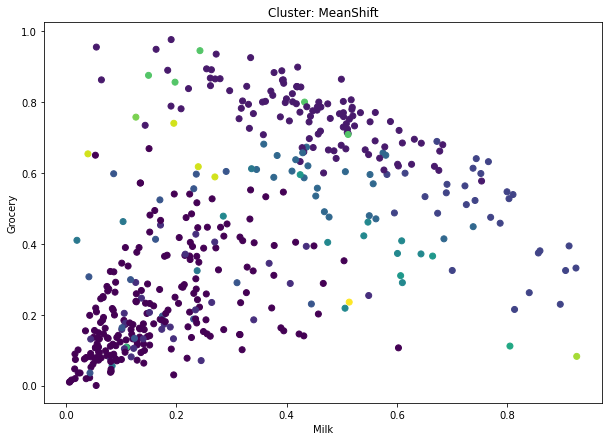

In [35]:
plt.figure(figsize=(10, 7))  
plt.scatter(df_nor['Milk'], df_nor['Grocery'], c=ms.labels_)
plt.title("Cluster: MeanShift")
plt.xlabel('Milk')
plt.ylabel('Grocery')
plt.show()

###MeanShift interactivo con el usuario

Number of estimated clusters :16


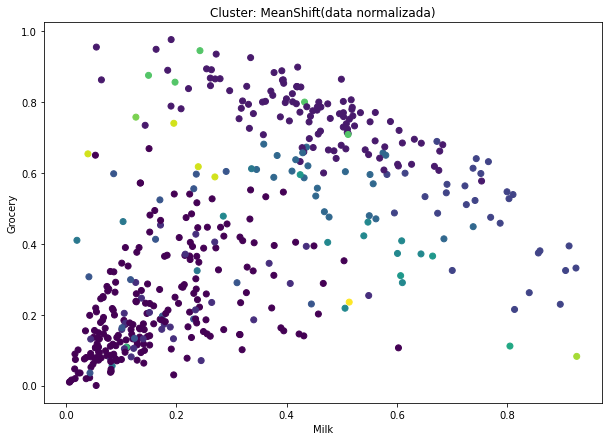

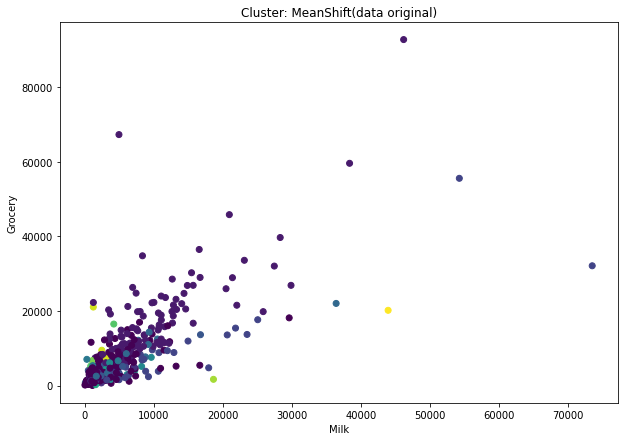

In [36]:
#@title Selección de valores { run: "auto" }
option = 'Milk' #@param ["Channel", "Region", "Fresh", "Milk", "Grocery", "Frozen","Detergents_Paper", "Delicassen"]
option_2 = 'Grocery' #@param ["Channel", "Region", "Fresh", "Milk", "Grocery", "Frozen","Detergents_Paper", "Delicassen"]

bandwidth = estimate_bandwidth(df_nor, quantile=0.1, n_samples=100)
ms = MeanShift(bandwidth=bandwidth,bin_seeding=True, n_jobs=4)
ms.fit(df_nor)

labels = ms.labels_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
print("Number of estimated clusters :{}".format(n_clusters_))

plt.figure(figsize=(10, 7))  
plt.scatter(df_nor[option], df_nor[option_2], c=ms.labels_)
plt.title("Cluster: MeanShift(data normalizada)")
plt.xlabel(option)
plt.ylabel(option_2)
plt.show()

plt.figure(figsize=(10, 7))  
plt.scatter(df[option], df[option_2], c=ms.labels_)
plt.title("Cluster: MeanShift(data original)")
plt.xlabel(option)
plt.ylabel(option_2)
plt.show()